In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data_clean = pd.read_csv('data\car_price_clean.csv')

In [ ]:
data_clean.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
lst_cat=[]
for i in data_clean.columns :
    if (data_clean.dtypes[i]=='O') :
        lst_cat.append(i)


In [ ]:
lst_cat

['CarName',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

# Encoding the categorical column for converting the categorical column into the numerical column

In [8]:
data_clean['fueltype'] = data_clean['fueltype'].map({'gas':1,'diesel':0})

In [9]:
data_clean['aspiration'] = data_clean['aspiration'].map({'turbo':1,'std':0})

In [10]:
ordinal_label_carbody = {k: i for i, k in enumerate(data_clean['carbody'].unique(), 0)}
data_clean['carbody']=data_clean['carbody'].map(ordinal_label_carbody)

In [11]:
data_clean['drivewheel'] = data_clean['drivewheel'].map({'fwd':1,'rwd':2,'4wd':3})

In [12]:
data_clean['enginelocation'] = data_clean['enginelocation'].map({'front':1,'rear':0})

In [13]:
ordinal_label_enginetype = {k: i for i, k in enumerate(data_clean['enginetype'].unique(), 0)}
data_clean['enginetype']=data_clean['enginetype'].map(ordinal_label_enginetype)

In [14]:
ordinal_label_enginetype = {k: i for i, k in enumerate(data_clean['enginetype'].unique(), 0)}
data_clean['enginetype']=data_clean['enginetype'].map(ordinal_label_enginetype)

In [15]:
ordinal_fuel_system = {k:i for  i,k in enumerate(data_clean['fuelsystem'].unique(),0)}
data_clean['fuelsystem']= data_clean['fuelsystem'].map(ordinal_fuel_system)

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

In [18]:
from pandas import factorize

labels, categories = factorize(data_clean["CarName"])
data_clean["labels"] = labels
abs(data_clean["price"].corr(data_clean["labels"]))

0.11426822160280321

There is very low correlation of the CarName and the price so we are dropping the CarName and the correlation is 0.11426822160280321

In [19]:
data_clean.drop('CarName',axis=1,inplace=True)

In [20]:
data_clean.drop('labels',axis=1,inplace=True)

In [21]:
data_clean.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,1,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,2,0,2,1,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,2,1,2,1,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,4,2,1,1,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,4,2,3,1,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

# Feature Selection

In [40]:
X = data_clean.drop('price',axis=1)
y = data_clean['price']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [42]:
from sklearn.feature_selection import mutual_info_regression
# Determining the mutual information
mutual_info = mutual_info_regression(X_train,y_train)

In [43]:
mutual_info

array([0.78988519, 0.46351142, 0.60286053, 0.63008466, 0.51506463])

In [27]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

curbweight          0.940702
citympg             0.834278
highwaympg          0.808959
horsepower          0.800384
enginesize          0.749475
carlength           0.600302
carwidth            0.540862
wheelbase           0.515107
fuelsystem          0.416236
boreratio           0.393965
drivewheel          0.310330
cylindernumber      0.266199
carheight           0.251903
stroke              0.244189
enginetype          0.162545
symboling           0.158117
peakrpm             0.155766
compressionratio    0.129127
aspiration          0.081553
carbody             0.067975
doornumber          0.036766
fueltype            0.000000
enginelocation      0.000000
dtype: float64

<Axes: >

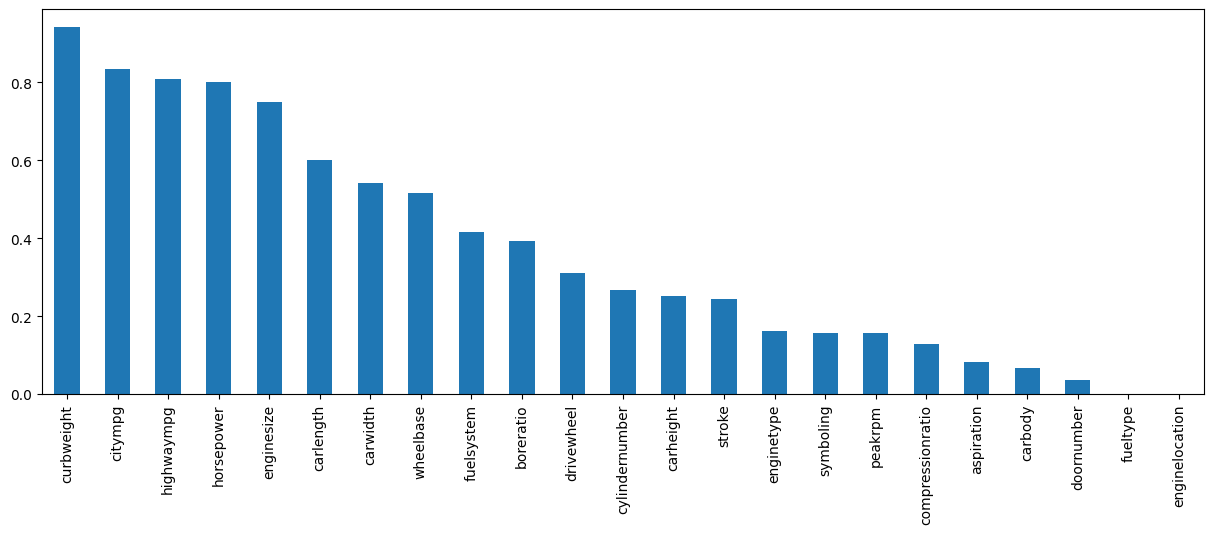

In [28]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [29]:
from sklearn.feature_selection import SelectKBest

Selecting the top 5 feature from the columns in the dataset

In [30]:
sel_five_cols = SelectKBest(mutual_info_regression,k=5)
sel_five_cols.fit(X_train,y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg'], dtype='object')

In [31]:
correlated_feature = X_train.columns[sel_five_cols.get_support()]

In [32]:
correlated_feature

Index(['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg'], dtype='object')

In [33]:
from sklearn.feature_selection import chi2

Copying the clean data in the new data before drooping the feature 

In [34]:
data_copy_bfs = data_clean.copy()

In [35]:
# List of all features in the dataset
all_features = data_clean.columns.tolist()

# List of correlated features
correlated_features = ['curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg','price']

# List of features to drop (features in all_features but not in correlated_features)
drop_features = [feature for feature in all_features if feature not in correlated_features]

# Now drop_features contains the features you want to drop
print(drop_features)


['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'enginetype', 'cylindernumber', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'peakrpm']


In [36]:
data_clean.drop(drop_features,axis=1,inplace=True)

In [37]:
data_clean.shape

(205, 6)

In [38]:
data_clean.head()

,curbweight,enginesize,horsepower,citympg,highwaympg,price
0,2548,130,111,21,27,13495.0
1,2548,130,111,21,27,16500.0
2,2823,152,154,19,26,16500.0
3,2337,109,102,24,30,13950.0
4,2824,136,115,18,22,17450.0


Saving the feature_selected column in the dataset

In [51]:
data_clean.to_csv('feature_selected.csv', index=False)

Train Test split on the new data set 

In [ ]:
X = data_clean.drop('price',axis=1)
y = data_clean['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

Since the output column of the data is the discrete values so it is the regression problem so we will apply the regression machine learing algorithim

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Creating the dictionary of the different machine learning model
model_dict={
    'LinearRegressor' : LinearRegression(),
    'SupportVector' : SVR(),
    'DecisionTree' : DecisionTreeRegressor(),
    'RandomForest' : RandomForestRegressor()
}

In [ ]:
for i in model_dict.values() :
    model = i
    model.fit(X_train,y_train)
   

In [ ]:
# Fitting the model in the ml algorithim
for i in model_dict.values() :
    model = i
    model.fit(X_train,y_train)

In [ ]:
# Now we are predicting the output
for model_name, model in model_dict.items():
    predict_value = model.predict(X_test)
    print("The predicted values from the model {} are {}".format(model_name, predict_value))


The predicted values from the model LinearRegressor are [26692.86770154 18764.16298753 11072.2017815  13571.23642226
 23724.5149382   6643.8432528   7322.18446954  7402.35447182
 10798.82808026  6107.98673839 15065.00008972  7682.32659777
 15641.42871473 11606.3649437  37736.64415431  5769.15081349
  -356.2554764  19032.30032867 11324.53830142 10279.77291089
 11175.00103635 22510.84719971  6564.33460104  3434.61343593
  5800.46429511 27289.1825897  15252.50021575 16889.68256018
  6679.62214609 16404.67978447 22790.28828007  5713.00477818
  7284.76618641 20610.63667127  9229.42426853 22710.77962832
 11995.35734688  8339.38413167  5321.59589404 19402.01555933
  9547.21355715 12205.3294903  14717.62483605  6910.06531134
  6417.24359529  9782.99126407  5713.00477818  8469.06854493
 17388.56978562 18944.84081173  5182.45575347 21589.39390433
  5612.14713322 11132.76603243  6627.94152244 14365.3586091
 15268.4019461   8339.38413167 24781.96766796  5566.96421063
 10434.67592638 22594.16884862

In [ ]:
# Calculating the r2 score
from sklearn.metrics import r2_score
for model_name, model in model_dict.items() :
    predict_value = model.predict(X_test)
    r2_score_value = r2_score(y_test,predict_value)
    print("The r2 score of the {} moddel is {}".format(model_name,r2_score_value)) 

The r2 score of the LinearRegressor moddel is 0.780501380528154
The r2 score of the SupportVector moddel is -0.06653715573360253
The r2 score of the DecisionTree moddel is 0.9286267365537104
The r2 score of the RandomForest moddel is 0.9354855316134221


From the above results we can see that Random Forest is giving the best accuracy which is 0.9396884866324074 which is around 93%

HyperParamerter Tunning on the Random Forest

In [ ]:
model_name = RandomForestRegressor(n_estimators=100)
model_name.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_predict = model_name.predict(X_test)

In [ ]:
y_predict

array([34977.315     , 18539.93      ,  9440.78      , 12922.4725    ,
       26665.8       ,  6754.61666667,  8109.19833333,  8093.4       ,
       12028.7425    ,  8113.615     , 14559.87833333,  8067.04      ,
       15601.35416667, 10569.24      , 41929.42      ,  6545.07833333,
        6215.095     , 14132.64      ,  9434.66      , 11199.355     ,
       10320.53      , 15543.54      ,  6888.08333333,  6254.73      ,
        7095.279     , 34979.595     , 10117.88      , 17299.69      ,
        6719.92666667, 16478.16      , 26675.725     ,  7208.70316667,
        8751.82166667, 17492.93      ,  8150.37      , 26675.725     ,
       13108.87      , 13875.0975    ,  7087.655     , 14795.04      ,
        8881.28833333, 11896.68      , 15778.8       ,  8152.045     ,
        6979.12333333,  8766.01666667,  7208.70316667,  7890.57      ,
       16070.18      , 13877.52      ,  7814.945     , 16875.75      ,
        6472.15333333,  9607.80333333,  6838.46666667, 15178.97083333,
      

In [ ]:
r2_score_rfc = r2_score(y_test,y_predict)

In [ ]:
r2_score_rfc

0.9403822613076599

Without hyperparameter tunning we are getting 94% accuracy

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees in the forest
    'max_depth': [50,60,70,80,90,100,110,120],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt'],   # Number of features to consider for the best split
    'bootstrap': [True, False]          # Whether bootstrap samples are used
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gridCV = GridSearchCV(model_name,param_grid=param_grid,cv=10)

In [ ]:
gridCV.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [50, 60, 70, 80, 90, 100, 110, 120],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
gridCV.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
y_pred = gridCV.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
r2 

0.9178114676677082

Finally we are choosing the Random Forest Regression as our final model with accuracy around 93%